# Project
#### Goal is to develop a ML model to predict whether an account will default next month, given demographics and historical data.

## Data Dictionary and Description
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

1. LIMIT_BAL: Amount of the credit provided (in New Taiwanese (NT) dollar) including individual consumer credit and the family (supplementary) credit.
2. SEX: Gender (1 = male; 2 = female).
3. EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 =others).
4. MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
5. AGE: Age (year).
6. PAY_1–Pay_6: A record of past payments. Past monthly payments, recorded from April to September, are stored in these columns. PAY_1 represents the repayment status in September; PAY_2 = repayment status in August; and so on up to PAY_6, which represents the repayment status in April.

***The measurement scale for the repayment status is as follows: -2 = no consumption;-1 = pay duly; 0 = the use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; and so on up to 8 = payment delay for eight months; 9 = payment delay for nine months and above.***

7. BILL_AMT1–BILL_AMT6: Bill statement amount (in NT dollar). BILL_AMT1 represents the bill statement amount in September; BILL_AMT2 represents the bill statement amount in August; and so on up to BILL_AMT7, which represents the bill statement amount in April.
8. PAY_AMT1–PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1represents the amount paid in September; PAY_AMT2 represents the amount paid in August; and so on up to PAY_AMT6, which represents the amount paid in April.

## __Part 1: Cleaning the dataset__

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 400 #high resolution figures



## _Load and Explore the data_


In [2]:
df = pd.read_excel('/Users/santoshmanne/Desktop/Credit-Card-Payment-Default/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,15d69f9f-5ad3,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.shape

(30000, 25)

In [7]:
#Unique ID
df['ID'].nunique()

29687

Has less than the number of rows, so there are some duplicates somewhere.

In [8]:
# Store the value counts in a variable defined as id_counts
id_counts = df['ID'].value_counts()
id_counts.head()

f0723a52-7018    2
2a793ecf-05c6    2
ff619017-560f    2
443324fb-5cfc    2
ff8b7170-ce3a    2
Name: ID, dtype: int64

In [9]:
# Display the number of grouped duplicated entries by running another value count
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

## Continuing Verification of Data Integrity

In [10]:
# assign the indices of the duplicated IDs to a variable called dupe_mask and display the first 5 duplicated ID's
dupe_mask = id_counts == 2
dupe_mask[0:5]

f0723a52-7018    True
2a793ecf-05c6    True
ff619017-560f    True
443324fb-5cfc    True
ff8b7170-ce3a    True
Name: ID, dtype: bool

In [11]:
# Access the index of id_count and display the first five rows
id_counts.index[0:5]

Index(['f0723a52-7018', '2a793ecf-05c6', 'ff619017-560f', '443324fb-5cfc',
       'ff8b7170-ce3a'],
      dtype='object')

In [12]:
# Select and store the duplicated IDs in a new variable called dupe_ids
dupe_ids = id_counts.index[dupe_mask]

In [13]:
# Convert dupe_ids to a list and then obtain the length of the list
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [14]:
# Verify the data in dupe_ids by displaying the first five entries
dupe_ids[0:5]

['f0723a52-7018',
 '2a793ecf-05c6',
 'ff619017-560f',
 '443324fb-5cfc',
 'ff8b7170-ce3a']

In [15]:
#Filtering the DataFrame in order to view all the columns for the first three duplicate IDs.
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
12091,ff619017-560f,160000,1,1,2,29,1,-1,-1,0,...,9032,5630,9141,19000,3000,9000,0,9596,10284,0
12191,ff619017-560f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12700,f0723a52-7018,260000,2,1,2,33,0,0,0,0,...,46654,202945,180891,11381,7256,2312,200128,7175,5612,0
12800,f0723a52-7018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17661,2a793ecf-05c6,290000,2,2,1,49,-2,-2,-1,2,...,11186,6863,6179,0,12000,0,0,0,0,0
17761,2a793ecf-05c6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# find the entries of the DataFrame that are equal to zero Create a Boolean matrix of the same size as the entire DataFrame
df_zero_mask = df == 0

In [17]:
# Create the Boolean series feature_zero_mask
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [18]:
# Calculate the sum of the Boolean series
sum(feature_zero_mask)

315

In [19]:
# Clean the DataFrame by eliminating the rows with all zeros, except for the ID
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [20]:
df_clean_1.shape

(29685, 25)

In [21]:
df_clean_1['ID'].nunique()

29685

## Exploring and Cleaning the Data

In [22]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

In [23]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [25]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Let's throw out these missing values, which were initially hidden from us in the `.info()` output, now.

In [26]:
# To find all the rows that don't have missing data for the PAY_1 feature
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [27]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [28]:
# Check how many rows have no missing data by calculating the sum of the mask
sum(valid_pay_1_mask)

26664

We see that 26,664 rows do not have the value 'Not available' in the PAY_1 column. We saw from the value count that 3,021 rows do have this value, and 29,685 – 3,021 = 26,664, so this checks out.

In [29]:
# Clean the data by eliminating the rows with the missing values of PAY_1
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [30]:
df_clean_2.shape

(26664, 25)

In [31]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [32]:
# convert the data type for PAY_1 from object to int64
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [33]:
# show the column metadata for PAY_1 and PAY_2
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


## Exploring the Credit Limit and Demographic Features

In [34]:
df_clean_2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,26664.000000,26664.000000,26664.000000,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.853098,1.550630,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,43338.894539,40338.136701,38889.872337,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047,0.221797
std,129839.453081,0.489272,0.789364,0.522015,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,64275.250740,60705.944083,59432.541657,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185,0.415463
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2341.750000,1745.000000,1256.000000,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.000000,18066.000000,17005.000000,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54727.500000,50290.500000,49253.750000,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


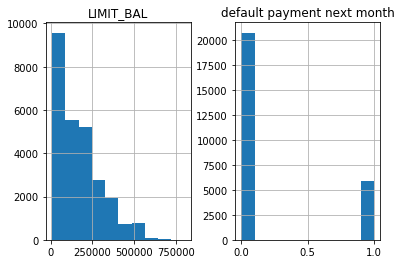

In [35]:
df_clean_2[['default payment next month', 'LIMIT_BAL']].hist()
plt.savefig("figure1.png")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cba84a8>,
      dtype=object)

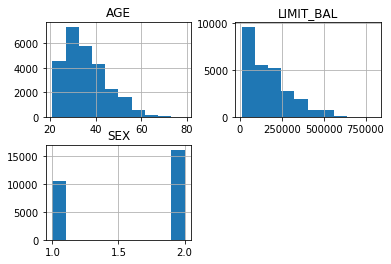

In [36]:
df_clean_2[['LIMIT_BAL', 'AGE', 'SEX']].hist()


In [37]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [38]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

In [39]:
# Assign unknown categories to other
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [40]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

__Examine and clean marriage features as well__

In [41]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [42]:
#Should only be (1 = married; 2 = single; 3 = others).
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [43]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

## Implementing  Encoding for a Categorical Feature

In [44]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

In [45]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [46]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


__"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"__

In [47]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [48]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

In [49]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [50]:
# Create a one-hot encoded(dummy variable) DataFrame of the EDUCATION_CAT column also a part of Feature Engineering
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [51]:
# Concatenate the one-hot encoded DataFrame to the original DataFrame
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [52]:
#Save the cleaned csv file onto the local disk
df_with_ohe.to_csv('/Users/santoshmanne/Desktop/Credit-Card-Payment-Default/cleaned_data.csv', index=False)